In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'mathtext.default':  'regular' })
from matplotlib.ticker import MultipleLocator
import json
import pandas as pd
from pathlib import Path

In [7]:
embodied_carbon = 26356.568
device_life_years = 5
embodied_carbon_per_sec=embodied_carbon / device_life_years / 365 / 24 / 3600


# LLM per token carbon

In [9]:
with open("/work/li.baol/GIT/llama_exp/inference_tests/prompt_sweeping/online_generation/data/motivation1_13b-chat.json") as f:
    llm_data = json.load(f)
per_token_carbon = np.mean((np.array(llm_data["co2"]) * 1.2 + embodied_carbon_per_sec * np.array(llm_data["time"])) / np.array(llm_data["num_output_tokens"]))
per_token_carbon

0.0002012360378000044

# LLM per request carbon

In [10]:
datasets = ["alpaca_5000", "math_all", "mmlu_5000", "naturalqa_5000", "scienceqa_5000", "triviaqa_5000"]
per_request_carbon = []
for dataset in datasets:
    with open(f"/work/li.baol/GIT/llama_exp/inference_tests/prompt_sweeping/online_generation/data/{dataset}_13b-chat.json") as f:
        data = json.load(f)
    per_request_carbon.append(np.mean(data["co2"]) * 1.2 + embodied_carbon_per_sec * np.mean(data["time"]))
per_request_carbon = np.mean(per_request_carbon)
per_request_carbon

0.04142565266685039

# OpenSora per frame and per video carbon

In [14]:
resolution = (240, 426)
num_frames = 16
with open(f"../data/char_sample_1/batch_1_steps_100_frames_{num_frames}_reso_{resolution[0]}x{resolution[1]}.json") as f:
    data = json.load(f)
per_video_carbon = np.mean(data["co2"])  * 1.2 + embodied_carbon_per_sec * np.mean(data["time"])
per_frame_carbon = per_video_carbon / num_frames
per_video_carbon, per_frame_carbon

(0.2520316173015315, 0.01575197608134572)

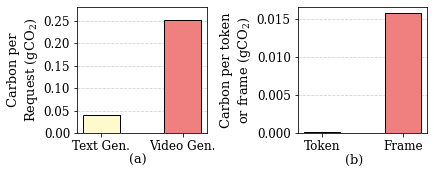

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.4, 'wspace': 0.7, 'bottom': 0.2, 
                    'top': 0.9, 'right':0.995, 'left':0.3}, figsize=(7,2.5))
width = 0.45
colors = ["lemonchiffon", "lightcoral"]
x1 = ["Text Gen.", "Video Gen."]
x2 = ["Token", "Frame"]

axs[0].bar(x1, [per_request_carbon, per_video_carbon], width, color=colors, edgecolor="black", zorder=3)
axs[0].set_ylabel("Carbon per\nRequest (gCO$_2$)", fontsize=13)
axs[0].set_ylim(0,.28)
axs[0].yaxis.set_major_locator(MultipleLocator(0.05))

axs[1].bar(x2, [per_token_carbon, per_frame_carbon], width, color=colors, edgecolor="black", zorder=3)
axs[1].set_ylabel("Carbon per token\nor frame (gCO$_2$)", fontsize=13)
# axs[1].set_yscale('log')
# axs[1].set_ylim(0,.28)
# axs[1].yaxis.set_major_locator(MultipleLocator(0.05))

for ax in axs:
    ax.grid(which='both', axis='y', color='lightgrey', ls='dashed', zorder=0)
    ax.tick_params(axis='both', which='major', labelsize=12)

fig.text(0.42, 0.03, "(a)", ha='center', fontsize=13)
fig.text(0.85, 0.03, "(b)", ha='center', fontsize=13)

plt.savefig(f"figures/fig1_text_vs_video.pdf", bbox_inches='tight')


In [74]:
per_video_carbon / per_request_carbon, per_frame_carbon / per_token_carbon

(6.083950428696856, 78.27611919590963)